In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_scaled = pd.DataFrame(scalar.fit_transform(df), columns=df.columns)
df_scaled

In [ ]:
df = pd.read_csv('/content/water_potability.csv')

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# ***Exploratory Data Analysis***

# ***Checking NULL Values***

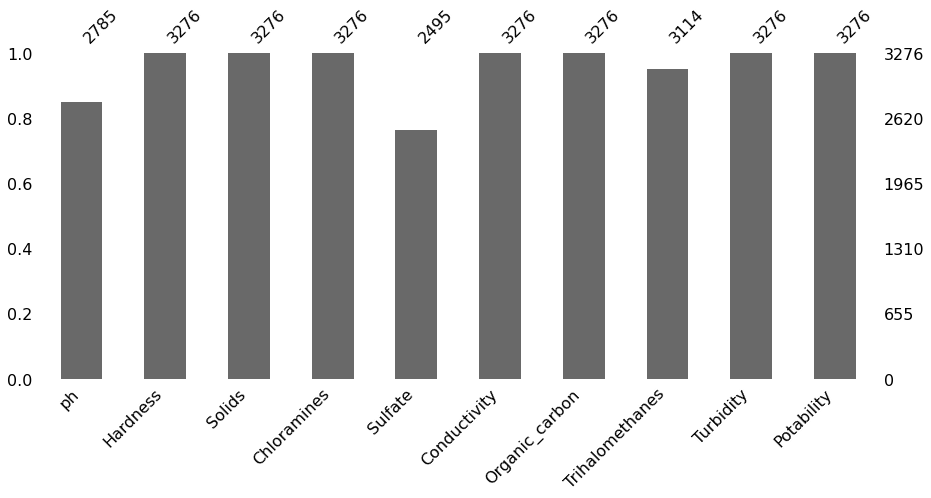

In [ ]:
msno.bar(df, figsize=(15,6)) #color = "#483D8B"

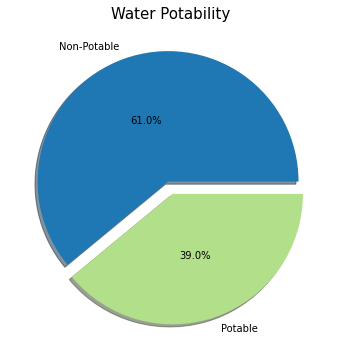

In [ ]:
labels = ['Non-Potable', 'Potable']
data = [df['Potability'].value_counts()[0], df['Potability'].value_counts()[1]]
fig1, ax1 = plt.subplots(figsize=(15, 6))
ax1.pie(data, labels = labels, explode=[0.05]*2, autopct='%1.1f%%',pctdistance=0.5, shadow=True, colors = ['#1f78b4','#b2df8a'])
plt.title("Water Potability", fontsize=15);
plt.show()

In [ ]:
df.describe().style.background_gradient()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


***Outlier Detection***

Let's look at outliers in the data.
i=1
plt.figure(figsize=(15,25))
for feature in train.columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature])
    i+=1

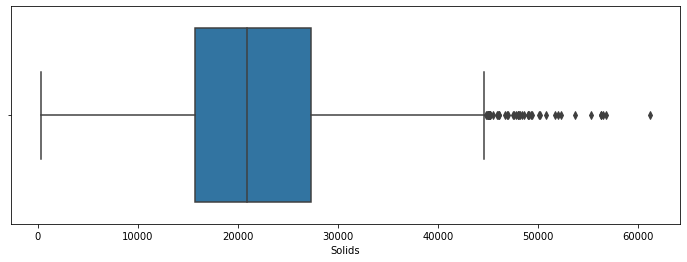

In [ ]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='Solids')

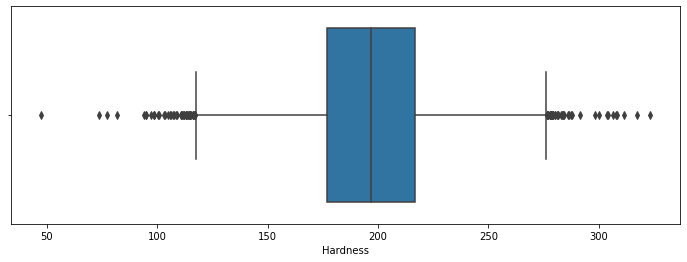

In [ ]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='Hardness')

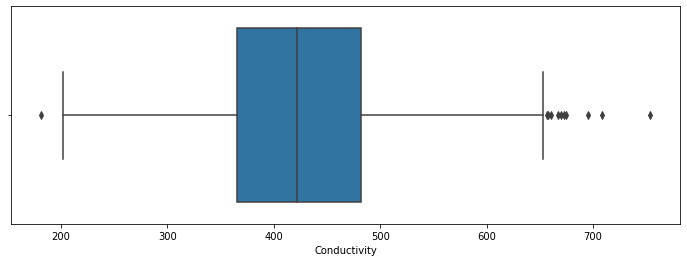

In [ ]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='Conductivity')

***Density Distribution***
fig, ax = plt.subplots(nrows=9, figsize=(10, 35))
count=0
for cols in list(df.iloc[:,1:-1].columns):
    sns.kdeplot(df[cols], fill=True, alpha=1, hue = df['Potability'], 
                palette='Paired', multiple='stack', ax=ax[count]).set_title(cols, fontsize=15)
    
    ax[count].set_xlabel(' ')
    ax[count].set_ylabel(' ')
    count=count++1  
plt.show()

# ***Distribution***

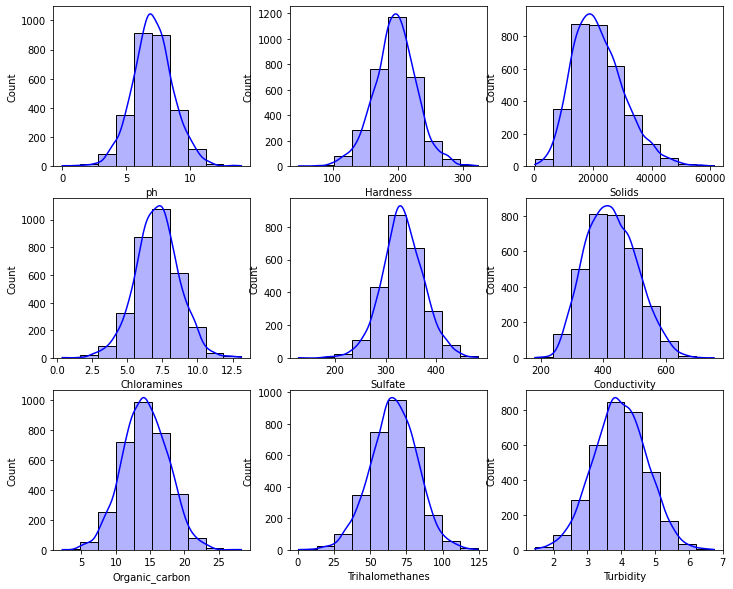

In [ ]:
plt.figure(figsize=(12,10))
for i, column in enumerate(df.columns[:9]):
    plt.subplot(3,3,i+1)
    sns.histplot(df[column],kde=True,alpha=0.3, bins=10, color='blue',common_norm=False)

In [ ]:
df.skew().sort_values(ascending = False)

Solids             0.621634
Potability         0.450784
Conductivity       0.264490
ph                 0.025630
Organic_carbon     0.025533
Turbidity         -0.007817
Chloramines       -0.012098
Sulfate           -0.035947
Hardness          -0.039342
Trihalomethanes   -0.083031
dtype: float64

Most features are normal distribution. Values between 0.5 to -0.5 will be considered as the normal distribution. Though Solids has value slightly above 0.5, we still consider it doesn't have skewness.

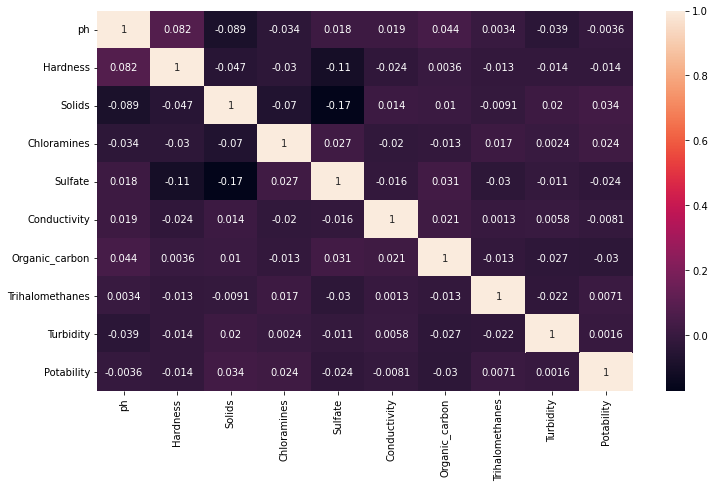

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

There is no column that has high correlation with Potability. The highest correlation is solids with 0.033 only.



***Filling the missing values with medain***

In [ ]:
df['ph'].fillna(df['ph'].median(), inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].median(), inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median(), inplace=True)

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
X = df.drop('Potability',axis=1)
y=df.Potability 

#***Feature Engineering***

In [ ]:
from imblearn.over_sampling import SMOTE
sampling = SMOTE()

In [ ]:
X_sampled,y_ = sampling.fit_resample(X,y)

In [ ]:
from collections import Counter

print('Before SMOTE:',Counter(y))
print('After SMOTE:',Counter(y_))

Before SMOTE: Counter({0: 1998, 1: 1278})
After SMOTE: Counter({0: 1998, 1: 1998})


In [ ]:
X_sampled.shape, (y_.shape)

((3996, 9), (3996,))

# ***Feature Scaling***

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_ = scaler.fit_transform(X_sampled)

In [ ]:
X_scaled = pd.DataFrame(X_, columns=X.columns)

# ***Model Building***

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y_, test_size=0.25, shuffle=True,random_state=101)

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

In [ ]:
from sklearn.metrics import classification_report,plot_roc_curve, accuracy_score

In [ ]:
models = {'GNaiveBayes':GaussianNB(),
          'bnb': BernoulliNB(),
          'SVC': SVC(),
          'forest':RandomForestClassifier(),
          'boost': AdaBoostClassifier(),
          'xgboost':XGBClassifier(),
          'KNN':KNeighborsClassifier(),
          'lightgbm':LGBMClassifier()}

Classification report for GNaiveBayes
              precision    recall  f1-score   support

           0       0.56      0.67      0.61       494
           1       0.60      0.48      0.53       505

    accuracy                           0.57       999
   macro avg       0.58      0.57      0.57       999
weighted avg       0.58      0.57      0.57       999


Classification report for bnb
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       494
           1       0.00      0.00      0.00       505

    accuracy                           0.49       999
   macro avg       0.25      0.50      0.33       999
weighted avg       0.24      0.49      0.33       999


Classification report for SVC
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       494
           1       0.67      0.68      0.67       505

    accuracy                           0.67       999
   macro avg       0.67     

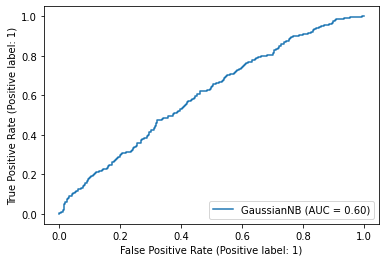

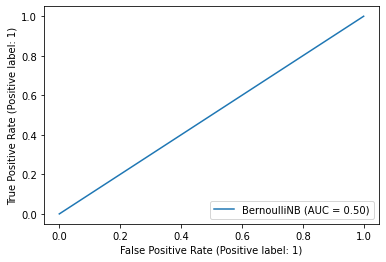

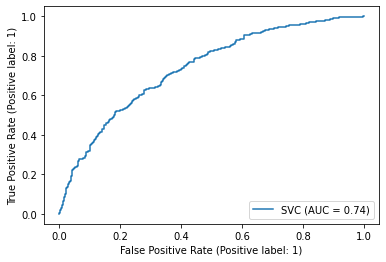

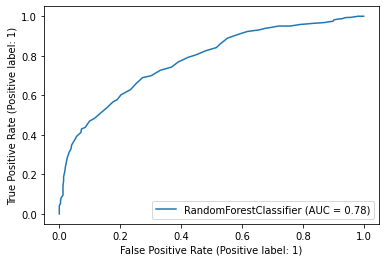

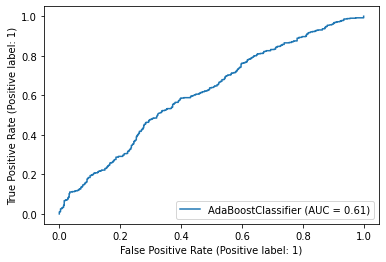

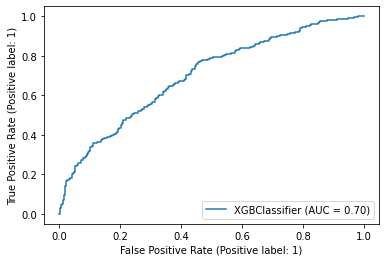

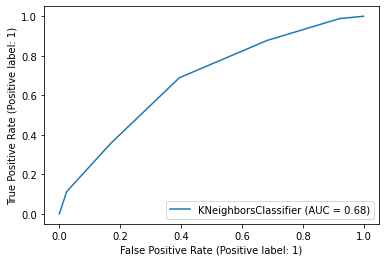

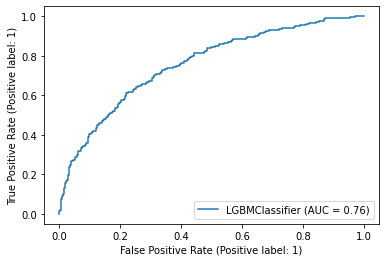

In [ ]:
for model_name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f'Classification report for {model_name}')
    print(classification_report(y_test,y_pred))
    print('')
    plot_roc_curve(model,X_test,y_test)

# ***Model Tuning***

Support Vector Classifier Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
svc=SVC()

In [ ]:
param_dist={'C':[1.2,1.5,2.2,3.5,3.2,4.1],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[1,2,4,8,10],'gamma':['scale','auto']}
random_search=RandomizedSearchCV(svc,param_distributions=param_dist,n_jobs=-1,verbose=4,cv=3)

In [ ]:
random_search

RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [1.2, 1.5, 2.2, 3.5, 3.2, 4.1],
                                        'degree': [1, 2, 4, 8, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   verbose=4)

In [ ]:
#fitting with data
random_search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [1.2, 1.5, 2.2, 3.5, 3.2, 4.1],
                                        'degree': [1, 2, 4, 8, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   verbose=4)

In [ ]:
random_search.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'degree': 8, 'C': 3.5}

In [ ]:
random_search.best_estimator_

SVC(C=3.5, degree=8, gamma='auto')

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = random_search.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[378 116]
 [358 147]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.77      0.61       494
           1       0.56      0.29      0.38       505

    accuracy                           0.53       999
   macro avg       0.54      0.53      0.50       999
weighted avg       0.54      0.53      0.50       999



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
xgboost = XGBClassifier()
random_search=RandomizedSearchCV(xgboost,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_scaled,y_)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 7.24 seconds.


In [ ]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.5, gamma=0.2, max_depth=10)

In [ ]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [ ]:
Xgboost = XGBClassifier(colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=15, min_child_weight =1
                        )
score=cross_val_score(Xgboost,X_scaled,y_,cv=10)

RandomForest Hyparameter Tuning

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]



# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
forest = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [ ]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=90, min_samples_split=5, n_estimators=1600)

In [ ]:
forest = RandomForestClassifier(max_depth=90, min_samples_split=5,min_samples_leaf=1,max_features='auto' ,n_estimators=1600,bootstrap=True)

In [ ]:
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=90, min_samples_split=5, n_estimators=1600)

In [ ]:
y_pred = forest.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       494
           1       0.72      0.69      0.70       505

    accuracy                           0.71       999
   macro avg       0.71      0.71      0.71       999
weighted avg       0.71      0.71      0.71       999

